<a href="https://colab.research.google.com/github/AhmetSarici/DataScience/blob/main/BTK_TensorFlow/ArabaFiyatAnalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel("merc.xlsx")
data.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [ ]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [ ]:
#null bir veri var mı? Kaç adet?
data.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


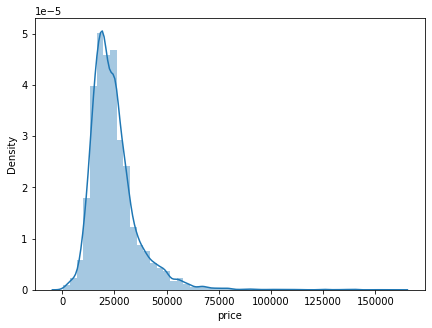

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data["price"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


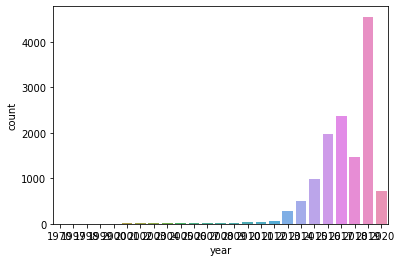

In [ ]:
#Hangi yılda ne kadar veri var?
sns.countplot(data["year"]);

In [ ]:
data.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [ ]:
#sadece price colonunu ile diğerleri arasındaki ilişki
data.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


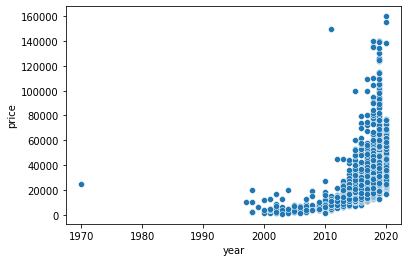

In [26]:
sns.scatterplot(x="year",y="price",data=data);

In [28]:
#En yüksek fiyatlı 20 araç
data.sort_values("price",ascending=False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [29]:
len(data)

13119

In [31]:
#en yüksek fiyatlıları azaltmak adına %99'u ile işlem yapmak için
len(data)*0.01

131.19

In [33]:
ydoksandokuz= data.sort_values("price",ascending=False).iloc[131:]
ydoksandokuz.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


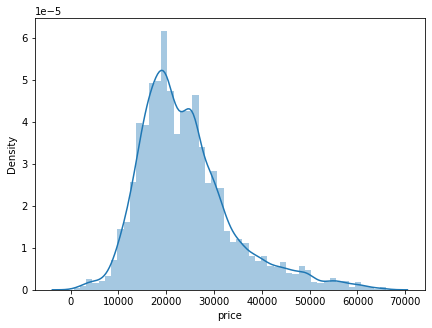

In [38]:
plt.figure(figsize=(7,5));
sns.distplot(ydoksandokuz["price"]);

In [41]:
#yıllara göre ortalama fiyat
data.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [42]:
ydoksandokuz.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [45]:
data[data.year != 1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [46]:
data = ydoksandokuz

In [47]:
data=data[data.year!=1970]
data.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [48]:
data.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [49]:
#transmission kolonunu çıkarma
data =data.drop("transmission", axis=1)

In [50]:
y=data["price"].values 
x=data.drop("price",axis=1).values
y

array([65990, 65990, 65980, ...,  1490,  1350,   650])

In [51]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [54]:
len(x_train)

9090

In [55]:
len(x_test)

3897

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler =MinMaxScaler()

In [58]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
x_train.shape

(9090, 5)

In [61]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [63]:
model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), batch_size=250, epochs =300 )

Epoch 1/300
37/37 [==============================] - 2s 7ms/step - loss: 672140480.0000 - val_loss: 688094720.0000
Epoch 2/300
37/37 [==============================] - 0s 3ms/step - loss: 672106432.0000 - val_loss: 688030464.0000
Epoch 3/300
37/37 [==============================] - 0s 4ms/step - loss: 671981184.0000 - val_loss: 687806592.0000
Epoch 4/300
37/37 [==============================] - 0s 3ms/step - loss: 671588672.0000 - val_loss: 687147968.0000
Epoch 5/300
37/37 [==============================] - 0s 3ms/step - loss: 670521472.0000 - val_loss: 685475520.0000
Epoch 6/300
37/37 [==============================] - 0s 3ms/step - loss: 668009856.0000 - val_loss: 681735104.0000
Epoch 7/300
37/37 [==============================] - 0s 3ms/step - loss: 662631424.0000 - val_loss: 673956032.0000
Epoch 8/300
37/37 [==============================] - 0s 3ms/step - loss: 651930944.0000 - val_loss: 659153664.0000
Epoch 9/300
37/37 [==============================] - 0s 3ms/step - loss: 6323917

In [65]:
kayipv =pd.DataFrame(model.history.history)
kayipv.head()

,loss,val_loss
0,672140480.0,688094720.0
1,672106432.0,688030464.0
2,671981184.0,687806592.0
3,671588672.0,687147968.0
4,670521472.0,685475520.0


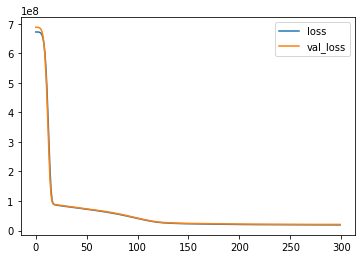

In [66]:
kayipv.plot();

In [67]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [68]:
td=model.predict(x_test)
td

array([[21869.092],
       [23332.506],
       [24505.309],
       ...,
       [25619.256],
       [12263.444],
       [24182.264]], dtype=float32)

In [69]:
mean_absolute_error(y_test,td)

3195.34095110268

In [70]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [72]:
3195/24074

0.1327157929716707

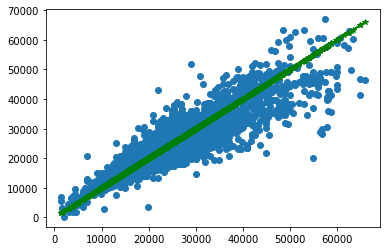

In [74]:
plt.scatter(y_test,td);
plt.plot(y_test,y_test,"g-*")

In [75]:
data.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [76]:
yeniaraba=data.drop("price",axis=1).iloc[2]

In [77]:
type(yeniaraba)

pandas.core.series.Series

In [78]:
yeniaraba = scaler.transform(yeniaraba.values.reshape(-1,5))

In [79]:
model.predict(yeniaraba)

array([[61319.23]], dtype=float32)

In [80]:
# 65980.0 fiyatındaki arabayı 61319.3 olarak tahmin etti.